# Сжатие изображения без потери качества при помощи PCA

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy.stats import stats
from sklearn.decomposition import PCA

Загрузим картинку и нарисуем ее в монохромный формат

In [292]:
%%capture
!wget -O flower.png "https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=0"

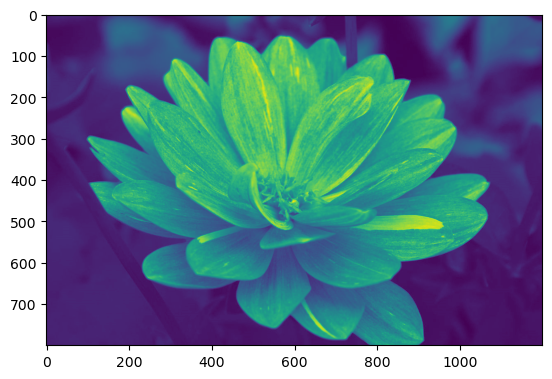

In [293]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Какого размера картинка img? В ответе запишите общее число пикселей.

In [294]:
print(f'Размер изображения: {img.shape[0]*img.shape[1]}')

Размер изображения: 960000


Посмотрим на матрицу изображения

In [295]:
img

array([[16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       ...,
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10]], dtype=uint8)

### Сейчас будем делать PCA

**Задание.** Масштабируйте данные, поделив значения в матрице на 255

In [296]:
img = img/255

**Задание.** Обучите PCA с 50-ю компонентами. Снизьте размерность.

In [297]:
pca = PCA(n_components=50)
img = pca.fit_transform(img)

## Вопрос для Quiz

Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами. Ответ округлите до сотых.

In [298]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
eigenvalues

array([1.62297142e+01, 5.13170228e+00, 3.38392843e+00, 1.63450681e+00,
       1.32944188e+00, 1.13256441e+00, 8.48199987e-01, 6.46776053e-01,
       5.22405529e-01, 4.78539991e-01, 3.61236489e-01, 3.21497210e-01,
       3.02803303e-01, 2.63788600e-01, 2.22509825e-01, 1.72577883e-01,
       1.58179025e-01, 1.38491628e-01, 1.24815326e-01, 1.10860648e-01,
       1.05371743e-01, 8.69634276e-02, 8.17185148e-02, 7.02798984e-02,
       6.88332946e-02, 6.18998174e-02, 6.01509285e-02, 5.60442005e-02,
       5.36730094e-02, 4.74360975e-02, 4.65523959e-02, 4.15054779e-02,
       3.90181004e-02, 3.48958846e-02, 3.38565041e-02, 3.21258650e-02,
       2.88297978e-02, 2.81892223e-02, 2.72334482e-02, 2.57421438e-02,
       2.52330461e-02, 2.39654152e-02, 2.14706544e-02, 2.06405713e-02,
       1.99895089e-02, 1.95850758e-02, 1.84396126e-02, 1.79873209e-02,
       1.75577546e-02, 1.60365177e-02])

**Задание.** Нарисуйте график, на котором отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

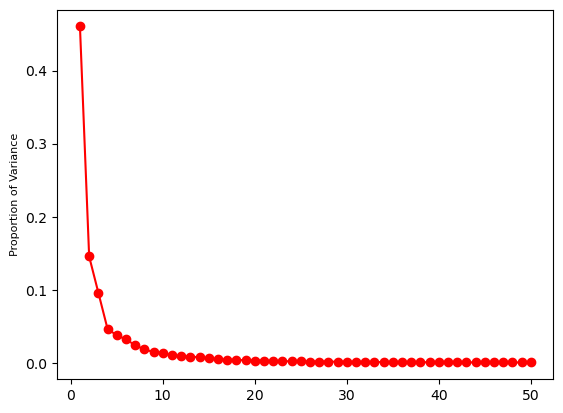

In [299]:
PC_numbers = np.arange(pca.n_components_) + 1
plt.plot(PC_numbers, prop_var, 'ro-')
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

### Восстанавливаем изображение

**Задание.** Восстановите изображение, используя pca.inverse_transform.

In [300]:
img_inverse = pca.inverse_transform(img)

**Задание.** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам).

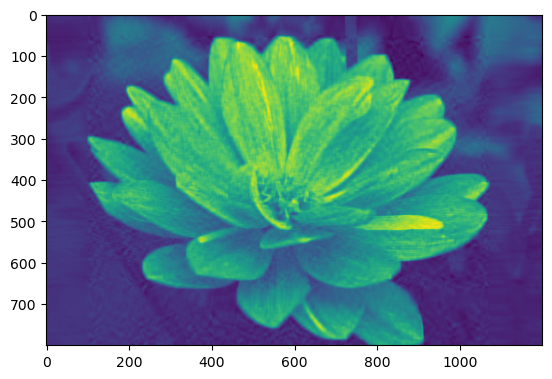

In [301]:
plt.imshow(img_inverse)
plt.show()

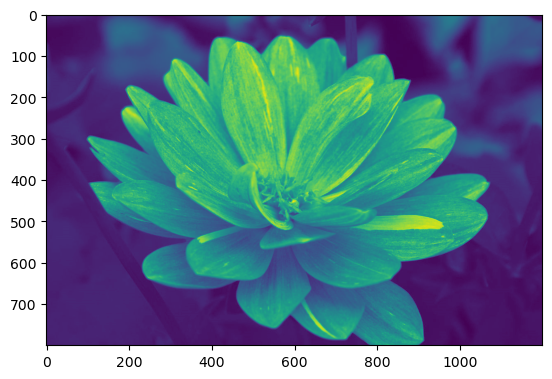

In [302]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Упало ли визуально качество при сжатии изображения до 50 главных компонент?

**Ответ:** Качество снизилось

## Вопрос для Quiz

Подберите минимальное количество компонент, при которых сжатое изображение визуально практически не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

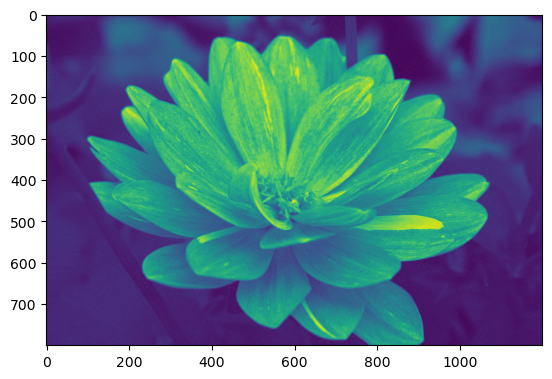

In [303]:
pca = PCA(n_components=150)
img = pca.fit_transform(img)
plt.imshow(pca.inverse_transform(img))
plt.show()


## Бонус

Попробуйте проделать все действия ноутбука, но уже с цветным изображением.

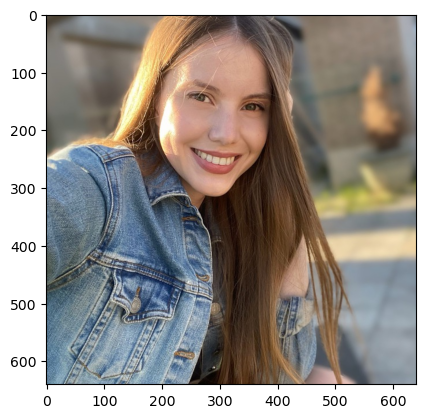

In [304]:
img = cv2.cvtColor(cv2.imread('photo.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Отличия от предыдущих шагов заключаются в том, что цветное RGB-изображение состоит из трех каналов - это матрица яркостей красного, матрица яркостей зеленого и матрица яркостей синего цветов.

Номер канала - последняя размерность в объекте `img`.
Например, матрица яркости красного - это `img[:,:,0]`.

Все действия выше нужно проделать с каждым каналом в отдельности, а потом объединить преобразованные изображения для каждого канала - чтобы получить итоговую картинку со сниженной размерностью.

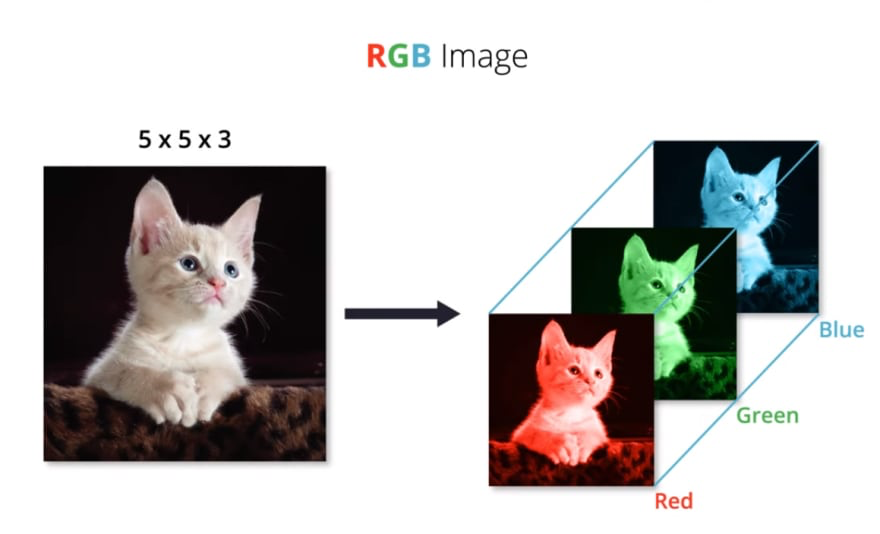

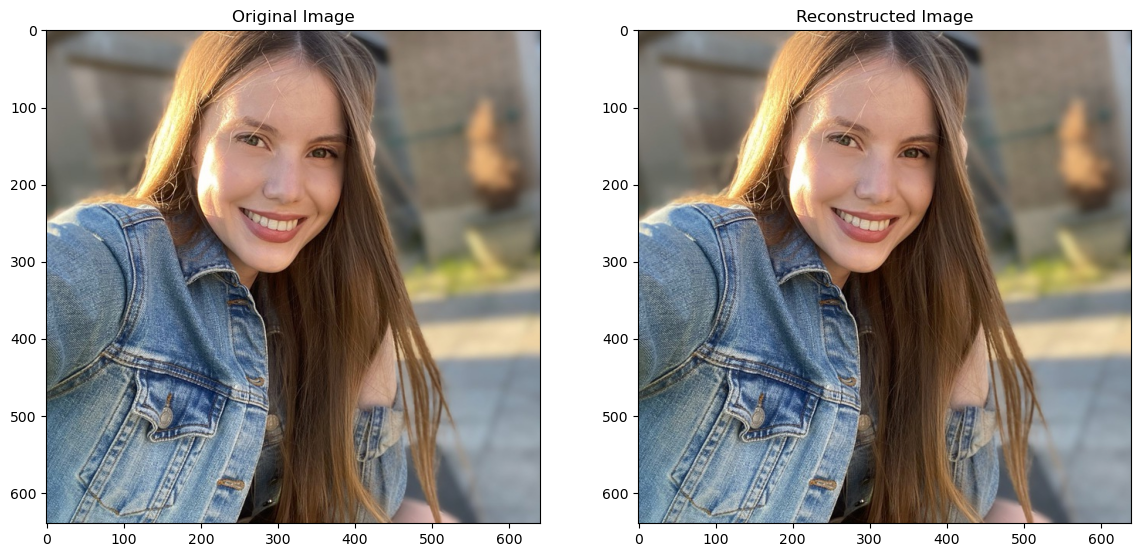

In [313]:
channel_blue = img[:,:,0]
channel_green = img[:,:,1]
channel_red = img[:,:,2]

pca_blue = PCA(n_components=500)
pca_green = PCA(n_components=500)
pca_red = PCA(n_components=500)

channel_blue_pca = pca_blue.fit_transform(channel_blue)
channel_green_pca = pca_green.fit_transform(channel_green)
channel_red_pca = pca_red.fit_transform(channel_red)

channel_blue_back = pca_blue.inverse_transform(channel_blue_pca)
channel_green_back = pca_green.inverse_transform(channel_green_pca)
channel_red_back = pca_red.inverse_transform(channel_red_pca)

image_back = np.stack([channel_blue_back, channel_green_back, channel_red_back], axis=-1)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_back.astype(np.uint8))
plt.title('Reconstructed Image')

plt.show()